In [1]:
# Name & student id: Johannes Petermann (i6041498)

# Introduction: 

### Seeing as one of the main concerns of the Dutch government during the pandemic was the potential overload of ICU patients coupled with the fact that it was often cited as the barometer with which they gauged and dictacted their policy, I thought it would be interesting to see if the resulting policy of different EU countries had an effect on the number of COVID patients in ICUs. To asses the policy I used the metric: Government Response Stringency Index; a composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response). And to asses the ICU patients I used the metric: Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people. I will explore and compare this data from several European countries.


In [10]:
# Preparing the data:

### To prepare the data I wanted to use, first I had to load the COVID-19 dataset maintained by Our World in Data. To manipulate and analyse the data, I imported the open source library pandas. Subsequently I saved the dataframe in a variable named: covidata.
import pandas as pd
covidata = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates=['date'])

In [40]:
### Then I had to select the rows and columns relevant to my research question. To answer said question I wanted to look at the Netherlands initially. Therefore I selected the data from the Netherlands.
dutchdata = covidata[covidata.location == "Netherlands"]

### To check whether this was succesful I used the code below:
dutchdata.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
102911,NLD,Europe,Netherlands,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.058,0.058,NaN,NaN,NaN,NaN,NaN,7.0,0.408,1.0,0.058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17173094.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
102912,NLD,Europe,Netherlands,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.058,0.000,NaN,NaN,NaN,NaN,NaN,8.0,0.466,9.0,0.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17173094.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
102913,NLD,Europe,Netherlands,2020-02-29,6.0,5.0,NaN,NaN,NaN,NaN,0.349,0.291,NaN,NaN,NaN,NaN,NaN,9.0,0.524,10.0,0.582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17173094.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
102914,NLD,Europe,Netherlands,2020-03-01,10.0,4.0,NaN,NaN,NaN,NaN,0.582,0.233,NaN,NaN,NaN,NaN,NaN,11.0,0.641,20.0,1.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17173094.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944,-2332.1,-7.62,-8.61,-135.799641
102915,NLD,Europe,Netherlands,2020-03-02,18.0,8.0,NaN,NaN,NaN,NaN,1.048,0.466,NaN,NaN,NaN,NaN,NaN,10.0,0.582,34.0,1.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17173094.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN


In [51]:
### Sure enough, I had selected the data from the Netherlands. Now I had to specifically look at the columns for stringency and ICU patients.
NLstringenicu = dutchdata[["stringency_index", "icu_patients_per_million"]]

### To check whether this was succesful again, I used the code below:
NLstringenicu.head()

,stringency_index,icu_patients_per_million
102911,5.56,0.408
102912,5.56,0.466
102913,5.56,0.524
102914,5.56,0.641
102915,5.56,0.582


In [57]:
# Exploring and cleansing the data:

### With the head() function I already did some exploration of the data. To get to know the dataset better and find out any issues that could arise from faulty data, I used the shape, hist()-, describe()-, and value_counts() functions. This gave me a better sense of what I was working with.
NLstringenicu.shape
### This meant there were slightly more than 700 datapoints of each variable.

(712, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3142b5910>,
      dtype=object)

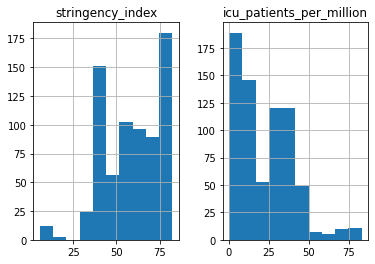

In [58]:
### The hist() function helped to get a visual idea of the data and spot any outliers
NLstringenicu.hist()

In [59]:
NLstringenicu.describe()

,stringency_index,icu_patients_per_million
count,712.000000,710.00000
mean,58.889607,22.85848
std,15.945976,17.64173
min,5.560000,0.40800
25%,41.670000,8.15200
50%,62.040000,20.06050
75%,75.000000,34.82200
max,82.410000,82.92000


In [60]:
NLstringenicu.value_counts()

stringency_index  icu_patients_per_million
41.67             11.646                      5
39.81             0.990                       4
41.67             12.811                      4
39.81             1.223                       4
41.67             11.588                      4
                                             ..
58.33             13.568                      1
                  13.335                      1
                  12.694                      1
                  12.520                      1
82.41             39.597                      1
Length: 590, dtype: int64

In [62]:
### To identify any missing data I used the isnull().sum() function.
NLstringenicu.isnull().sum()
### It found that icu_patients_per_million had 2 missing values.

stringency_index            0
icu_patients_per_million    2
dtype: int64

In [70]:
### To resolve this issue of missing data, the data had to be removed from the dataset. The code below with the dropna() function worked for this purpose.
NLstringenicu.dropna()

,stringency_index,icu_patients_per_million
102911,5.56,0.408
102912,5.56,0.466
102913,5.56,0.524
102914,5.56,0.641
102915,5.56,0.582
...,...,...
103618,58.33,12.694
103619,58.33,12.461
103620,58.33,13.335
103621,58.33,12.287


In [71]:
### Of course, after a little trial and error, I understood that the method only changed but did not save the changed dataframe in memory. The dataframe had to be assigned to another variable again.
NLstringenicu2 = NLstringenicu.dropna()

In [72]:
### To check whether this was succesful, the code below was used:
NLstringenicu2.isnull().sum()
### Apparently it succeeded in its objective and now the dataframe no longer contained any missing values.

stringency_index            0
icu_patients_per_million    0
dtype: int64

In [81]:
# Describing and visualizing the data: 

### In order to give a description of the population that was used, it was needed to make a table with descriptive statistics. Also, to visualize the data the visualization library altair was imported. 
import altair as alt

In [115]:
### Below, the relevant parameters chosen for my research question for the Dutch population are shown. Using the date, one gets a clearer picture when certain instances of stringency or icu patients were higher.
dutchdata.groupby('date')['icu_patients_per_million', 'stringency_index'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,icu_patients_per_million,stringency_index
date,,
2020-02-27,0.408,5.56
2020-02-28,0.466,5.56
2020-02-29,0.524,5.56
2020-03-01,0.641,5.56
2020-03-02,0.582,5.56
...,...,...
2022-02-03,12.694,58.33
2022-02-04,12.461,58.33
2022-02-05,13.335,58.33


In [117]:
### Additionally, the most important plot can be seen below. This plot shows the stringency vs ICU patients. It's plain to see that a higher index correlates with a higher number of ICU patients.
alt.Chart(NLstringenicu2).mark_line().encode(
    x='stringency_index',
    y='icu_patients_per_million').properties(title='Stringency vs ICU patients')

alt.Chart(...)

In [184]:
### To get an even more thourough picture of the data, below a heatmap can be seen. The data is binned or grouped to emphasize the similitude of the parameters. 
alt.Chart(NLstringenicu2).mark_rect().encode(
    x=alt.X('stringency_index', bin=True),
    y=alt.Y('icu_patients_per_million', bin=True),
    color='count()').properties(title='Heatmap of Stringency binned vs ICU patients binned')

alt.Chart(...)

In [152]:
### To make it interactive, a function whereby one could select different countries had to be created.
def select_country(location, df): 
  return df.loc[df['location'] == location, ]

In [161]:
### Helping make the GUI more interactive, jupyter-widgets and associated functions had to be imported
import ipywidgets as widgets

In [162]:
from ipywidgets import interact

In [163]:
from ipywidgets import fixed

In [167]:
### Here I made an interactive table of the main covidata dataframe
interact(select_country, location=['Netherlands', 'Germany', 'Belgium', 'United Kingdom'], df=fixed(covidata));

interactive(children=(Dropdown(description='location', options=('Netherlands', 'Germany', 'Belgium', 'United K…

In [180]:
### This is a function with which one can select a country and a plot is made of stringency vs icu patients.
def plot(location, df):

  plotdata = select_country(location, df)

  chart = alt.Chart(plotdata).mark_line().encode(
      x='stringency_index:T',
      y='icu_patients_per_million:Q',
      tooltip='location'
  ).properties(title='Stringency vs ICU patients')

  display(chart)

In [181]:
### As an example, Netherlands is chosen
plot('Netherlands', covidata)

alt.Chart(...)

In [185]:
### An improvement on the function is the addition of a dropdown list with neighbouring countries. It's interesting to see the differences between the countries.
interact(plot,
         location=[('Netherlands'),
         ('Belgium'),
         ('United Kingdom'),
         ('Germany')],
         df=fixed(covidata));

interactive(children=(Dropdown(description='location', options=('Netherlands', 'Belgium', 'United Kingdom', 'G…

In [ ]:
# Conclusion: 

### The data shows that the stringency index generally follows the same path of the number of ICU patients. An explanation can be that the measures that are put in place are reactionary and not necessarily cause a decrease in the number of ICU patients themselves. Although this can also not be said for certain. Ideally, there would be a decrease in ICU cases following an increase in stringency. The data for the Netherlands and the UK do not seem to follow this principle. In both countries there is a sharp positive correlation instead of a negative one. In both Belgium and Germany the data seems more erratic. This can mean that the stringency has a different (better) effect than in the other countries but also indicates less correlation (negative or positive).